In [ ]:
#modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from collections import Counter

Use `df.copy(deep=True) ` in order to make copies of data frames before manipulating them directly


In [ ]:
#Setting Global Variables for Data Frames
df_311 = pd.read_csv('311data.csv',sep=',')
df_census = pd.read_csv('tracks_census_block_group_by_address_city_of_revere_0224.csv',sep=',')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17,24,50,66,68,69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (101,102,103,104,105,106,107,108) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Generates Map of Revere, Colored by District


In [ ]:

def generateBaseMap(default_location=[42.408428, -71.011993]):
    base_map = folium.Map(location=default_location)
    return(base_map)
data311 = df_311.copy(deep=True)
base_map=generateBaseMap()
base_map.save('reverebase.html')
locations = data311[['Latitude', 'Longitude']] #add points on map
addresses = data311['Complete Address']
dists = data311['District']
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
locationlist = locations.values.tolist()
for point in range(0, len(locationlist)):
    folium.CircleMarker(locationlist[point], radius=.5, color=colors[dists[point]-1], popup=addresses[point]).add_to(base_map)
base_map.save('reverelatlong.html')

Bar Charts for 311 Data

['Covid19 Food Assistance', 'Pothole', 'Overgrowth/Unsanitary Conditions', 'Sidewalk repair', 'Private Property: Unsanitary or improper trash disposal', 'Request for New/Replacement Recycling Bin', 'Debris/Litter Pickup', 'Dead animal', 'Tree maintenance request', 'Sign Missing/Damaged']


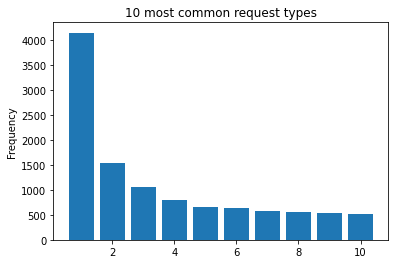

In [ ]:

df311 = df_311.copy(deep=True)

cols = ['Address', 'Comments', 'Create Date', 'Department', 'Department ID', 'District', 'Master Request', 'Request ID', 'Request Type'  ]
df311 = df311[cols]
df311.head()


# MOST POPULAR REQS
c = ((Counter(df311['Request Type'])).most_common(10))
x, y = [], []
for i in range(len(c)):
    x.append(i+1)
    y.append(c[i][1])
plt.bar(x,y)
plt.title('10 most common request types')
plt.ylabel('Frequency')
print([i[0] for i in c ])

#convert to yeardf, plot subplots
import re

yre =re.compile(r'20\d\d')

def dfTop(df,col, n):
    d = {}
    for i in list(set((yrdf['Year']).values)):
        d[i] = []
    for i in range(len(df[col])):
        d[df.iloc[i]['Year']] += [yrdf.iloc[i]['Request Type']]
    for i in list(set((yrdf['Year']).values)):
        d[i] = [i[1] for i in Counter(d[i]).most_common(n)]
        #d[i] = Counter(d[i]).most_common(n)
    return d
tdict = { 
    'Uncleared sidewalk - Private Property': 'Trash',
}



Counter({2018: 5451, 2019: 6925, 2020: 11069})

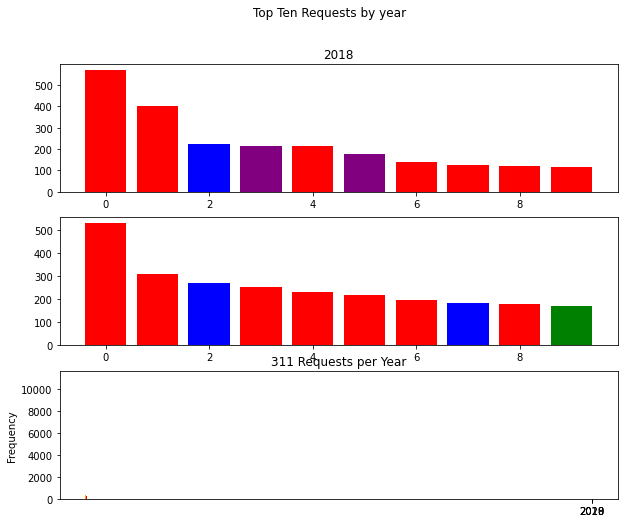

In [ ]:
#Evntually make trans table to  reduce number  of types

df311['Year'] = [int(yre.search(i)[0]) for i in df311['Create Date']]
yrdf = df311.loc[(df311['Year'] > 2017) & (df311['Year'] < 2021 )]
yrdf= yrdf[['Year','Request Type']]
yrdf['Request Type'] = yrdf['Request Type'].str.translate(tdict)
Counter(yrdf['Request Type']).most_common()
#yrdf.head()

c1 = ['r', 'r', 'b', 'purple', 'r', 'purple', 'r', 'r', 'r', 'r' ]
c2 = ['r', 'r', 'b', 'r', 'r', 'r', 'r', 'b', 'r','g']
c3 = ['orange','orange','orange', 'b', 'r', 'orange','r','r','r']
d = dfTop(yrdf,'Year',10)
f, ax = plt.subplots(3,1,figsize=(10,8))

plt.subplot(3, 1, 1)
plt.bar(range(len(d[2018])),d[2018], color = c1)
plt.title("2018")

plt.subplot(3, 1, 2)
plt.bar(range(len(d[2019])),d[2019], color = c2)


plt.subplot(3, 1, 3)
plt.bar(range(len(d[2020])),d[2020], color = c3)
plt.title("2020")

plt.suptitle("Top Ten Requests by year")
plt.plot()

#requests per year
plt.bar(Counter(yrdf['Year']).keys(),Counter(yrdf['Year']).values(),color = ['g','g','g'])
plt.title('311 Requests per Year')
plt.xticks([2018,2019,2020])
plt.ylabel('Frequency')

Counter(yrdf['Year'])